In [108]:
# pd.set_option('max_colwidth', 50)

In [109]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

# Scraping

## Scrape URL of articles

In [ ]:
links = []
year_list = []

for year in range(2012, 2023, 1):
    year=f"https://search.tv2.dk/?query=sygeplejersker+{year}"
    year_list.append(year)
    
    for month in range(1,10,1): #Måned 1-9
        search_month=f"-0{month}&sort=relevance&page="
        
        for page in range(1,11,1): # (start, stop, step)
            url = year+search_month+f"{page}"
            links.append(url)
    
    for month in range(10, 13): #måned 10-12
        search_month=f"-{month}&sort=relevance&page="
        
        for page in range(1,11,1): # (start, stop, step)
            url = year+search_month+f"{page}"
            links.append(url)
len(links)

In [ ]:
article_url=[]
for i in tqdm(links):
    try:
        resp_page = requests.get(i,headers={"Name" : "Oliver Fredborg Smietana" , "email": "ofsmietana@gmail.com"})
        soup = BeautifulSoup(resp_page.content, 'lxml')
        for link in soup.find("section").find_all('a', href=True):
            article_url.append(link['href'])
    except:
        pass
    time.sleep(0.25)
len(article_url)

In [ ]:
df = pd.DataFrame(article_url) 
df.to_csv('article_url.csv') 

In [5]:
df

,0
0,https://nyheder.tv2.dk/2012-01-27-paa-jagt-eft...
1,https://nyheder.tv2.dk/business/2012-01-19-dan...
2,https://nyheder.tv2.dk/udland/2012-04-02-syv-e...
3,https://nyheder.tv2.dk/krimi/2012-03-08-42aari...
4,https://nyheder.tv2.dk/udland/2012-04-22-sudan...
...,...
8753,https://nyheder.tv2.dk/udland/2011-01-21-giffo...
8754,https://nyheder.tv2.dk/business/2015-11-04-rob...
8755,https://nyheder.tv2.dk/2021-01-28-dagens-overb...
8756,https://tvtid.tv2.dk/nytomtv/article.php/id-38...


## Use URL to scrape articles

## Create dataframe and save it 

# Cleaning

In [225]:
# read file 
tv2 = pd.read_csv('articles_tv2')

In [259]:
tv2 = tv2[0:100]
tv2.author[11]

'ritzau'

In [228]:
# Remove 'back' and 'next' rows 
tv2 = tv2[tv2.titles != 'Søg på TV 2']

In [229]:
# Remove rows with the tag 'Udland'
# tv2 = tv2[tv2.tag != 'Udland']

In [230]:
tv2.h2[0]

'Dansk sygeplejeråd: "What a waste" Flere sygeplejersker har stress Hellere udlandet end at flere forlader faget 11 arbejdsgivere fra udlandet Leder også efter farmaceuter'

# Descriptive statistics

#### Global aesthetics

In [231]:
plt.style.use('ggplot')
sns.set_style("whitegrid")

#### Plot: Tag occurrence

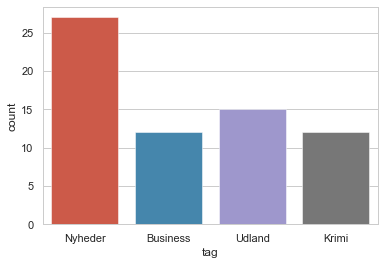

In [232]:
plt.style.use('ggplot')
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows = 1, ncols = 1) # create placeholder for plot
ax = sns.countplot(x = 'tag', data = tv2)

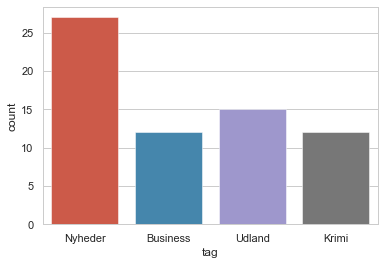

In [233]:
fig, ax = plt.subplots(nrows = 1, ncols = 1) # create placeholder for plot
ax = sns.countplot(x = 'tag', data = tv2)

In [234]:
tv2[tv2.author == r'Søg på TV 2']

,titles,sub_header,h2,content,author,tag,date,link,tv2


#### Number of articles from ritzau

In [116]:
import re

In [269]:
counter = 0

for i in range(0,100):
    try: 
        if re.findall(r'[Rr]itzau', tv2.author[i]) == ['ritzau' or 'Ritzau']:
            counter += 1
    except: 
        pass

In [270]:
counter

45